**Elements of Statistical Learning (ESL)**



In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import statsmodels.api as sm

from sklearn import mixture

# Code formatting Jupyter black
%load_ext nb_black
sns.set_context("talk")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

[ESL PDF](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12_toc.pdf)
[ESL data](https://web.stanford.edu/~hastie/ElemStatLearn/)

# Chapter 6. Kernel Smoothing Methods

[ESL data]

# 6.8 Mixture Models for Density Estimation and Classification

Recreate figure 6.17 using the heart study.

In [10]:
! ls ESL_DATA

SAheart.data sachs.data


<IPython.core.display.Javascript object>

In [8]:
sorted(os.listdir())

['.DS_Store',
 '.ipynb_checkpoints',
 'ESL.ipynb',
 'ESL_data',
 'ISLR_data',
 'ISLR_figures',
 'Insight Deep Learning tutorial 1.1 - Keras and TensorFlow.ipynb',
 'Linear_Regression_QA_200506.ipynb',
 'Linear_Regression_QA_200813.ipynb',
 'Linear_Regression_Q_200506.ipynb',
 'Linear_Regression_problem_and_teachback.ipynb',
 'ML_ISLR_C03_Linear_Regression.ipynb',
 'ML_ISLR_C04_Classification.ipynb',
 'ML_ISLR_C05_Resampling_Methods.ipynb',
 'ML_ISLR_C06_LinModelSelection_and_Regularization.ipynb',
 'ML_ISLR_C08_Trees.ipynb',
 'ML_ISLR_C10_Unsupervised_Learning.ipynb',
 'ML_daily_problems.ipynb',
 'My_first_NN.h5',
 'NLP.ipynb',
 'custom_scatterplot_function_in_python-original.ipynb',
 'data_visualizations.ipynb',
 'prod_analytics.ipynb',
 'python_scatterplot_by_ben.md']

<IPython.core.display.Javascript object>

In [13]:
df_heart = pd.read_csv("ESL_data/SAheart.data", index_col=0)
df_heart.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


<IPython.core.display.Javascript object>

In [29]:
df_heart.query("`chd` == 0")

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
13,118,0.00,1.88,10.05,Absent,59,21.57,0.00,17,0
...,...,...,...,...,...,...,...,...,...,...
454,154,5.53,3.20,28.81,Present,61,26.15,42.79,42,0
458,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0


<IPython.core.display.Javascript object>

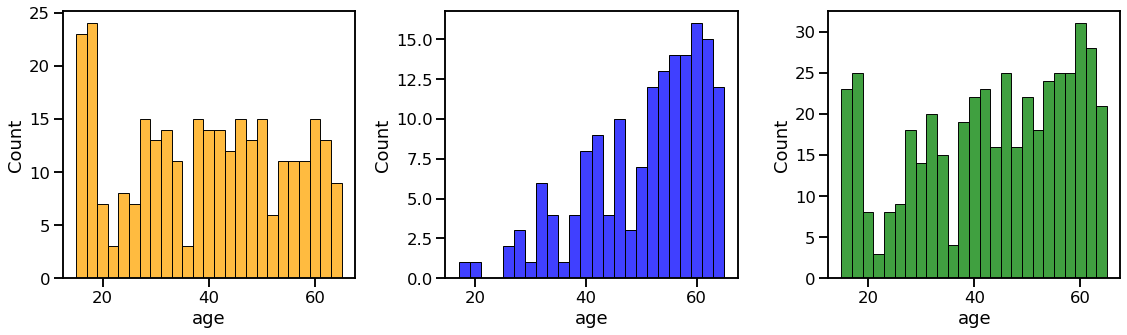

<IPython.core.display.Javascript object>

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.histplot(df_heart.query("`chd` == 0"), x="age", color="orange", binwidth=2, ax=ax1)
sns.histplot(df_heart.query("`chd` == 1"), x="age", color="blue", binwidth=2, ax=ax2)
sns.histplot(df_heart, x="age", color="green", binwidth=2, ax=ax3)

plt.tight_layout()

## Manual calculation of Gaussian mixture

In [85]:
import scipy.stats as stats

<IPython.core.display.Javascript object>

In [89]:
def plot_gaussian(mu, sd, color, ax):
    x = np.linspace(mu_chd0 - 3 * sd_chd0, mu_chd0 + 3 * sd_chd0, 100)
    ax.plot(x, stats.norm.pdf(x, mu, sd), color)

<IPython.core.display.Javascript object>

In [88]:
mu_chd0 = df_heart.query("`chd` == 0")["age"].mean()
sd_chd0 = df_heart.query("`chd` == 0")["age"].std()
print("No CHD, mean +/- SD: {0:0.2f} +/0 {1:0.3f}".format(mu_chd0, sd_chd0))

mu_chd1 = df_heart.query("`chd` == 1")["age"].mean()
sd_chd1 = df_heart.query("`chd` == 1")["age"].std()
print("CHD, mean +/- SD: {0:0.2f} +/0 {1:0.3f}".format(mu_chd1, sd_chd1))

No CHD, mean +/- SD: 38.85 +/0 14.883
CHD, mean +/- SD: 50.29 +/0 10.649


<IPython.core.display.Javascript object>

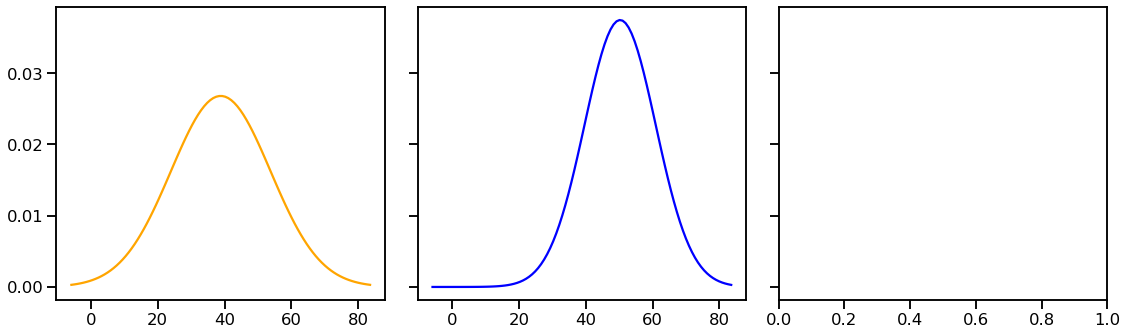

<IPython.core.display.Javascript object>

In [91]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

plot_gaussian(mu_chd0, sd_chd0, color='orange', ax=ax1)
plot_gaussian(mu_chd1, sd_chd1, color='blue', ax=ax2)

plt.tight_layout()


## Sklearn Gaussian mixture models

[documentation](https://scikit-learn.org/stable/modules/mixture.html)

Difference between GMM and kernel density estimate?

In [40]:
from sklearn import mixture
import itertools

<IPython.core.display.Javascript object>

In [37]:
X = df_heart[["age", "chd"]]

<IPython.core.display.Javascript object>

In [45]:
# Fit the Gaussian mixture, knowing that there are two components
gmm = mixture.GaussianMixture(n_components=2, covariance_type="full").fit(X)

<IPython.core.display.Javascript object>

In [70]:
# Inspect the values of the prediction
val = df_heart["chd"]
pred = gmm.predict(X)

df_valpred = pd.DataFrame({"val": val, "pred": pred})
df_valpred

,val,pred
row.names,,
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
...,...,...
459,0,1
460,1,0
461,0,1


<IPython.core.display.Javascript object>

It looks like the prediction is the precise opposite of the class, but I think this is okay since no labels are given to the model. Verified that there's perfect anti-class prediction for all values with `value_counts`.

In [71]:
df_valpred.sum(axis=1).value_counts()

1    462
dtype: int64

<IPython.core.display.Javascript object>

In [72]:
X.head()

,age,chd
row.names,,
1,52,1
2,63,1
3,46,0
4,58,1
5,49,1


<IPython.core.display.Javascript object>

In [76]:
gmm.predict(np.array([10, 26, 50, 60]).reshape(-1, 1))

ValueError: Expected the input data X have 2 features, but got 1 features

<IPython.core.display.Javascript object>